# Partie codage
On va maintenant passer à la partie code.

## Modélisation sous Python
* On va modéliser un objet (ou une image) par une liste de deux éléments `[x, d]` correspondant à sa position $x$ sur l'axe optique et sa taille transverse $d$.
    * Dans la suite, si on utilise comme argument d'une fonction un objet lumineux (donc une liste de deux éléments), il sera appelé `obj` ou `obj1, obj2, ...`.
* On va modéliser une lentille mince par une liste de deux éléments `[x, f]` correspondant à sa position $x$ sur l'axe optique de son centre optique et sa distance focale image $f'$.
    * Dans la suite, si on utilie comme arguments d'une fonction une lentille (donc une liste de deux éléments), il sera appelé `L` ou `L1, L2, ...`.

__Attention: $x,d,f$... ne sont PAS définies par Python__. On lui donne des listes __dont il faudra extraire les éléments qui correspondront à ces grandeurs.__

> __Exercice :__  
> 1. Comment appelle-t-on le point sur l'axe optique où doit être placé l'objet?
> 2. Ecrire une fonction `image(L, obj)` qui renvoie les caractéristiques d'une image (liste à deux éléments) d'un objet `obj` par une lentille `L`.
> 3. Ecrire une fonction `microscope(fobj, f2, Delta, obj)` qui renvoie les caractéristiques d'une image (liste à deux éléments) d'un objet `obj` par un microscope dont la focale de l'objectif est `fobj`, celle des lentilles de l'oculaire `f2` (on rappelle qu'il y en a deux) et l'intervale optique `Delta`
> 4. Pour des objets situé entre l'objectif et 2cm en amont de l'objectif, tracer deux graphiques donnant l'un la position de l'image finale en fonction de la position de l'objet et la taille de l'image finale en fonction de la taille de l'objet. En déduire visuellement où placer l'objet. (Ne pas hésiter à "zoomer").
> 5. \*(A traiter plus tard lorsqu'on aura vu la résolution d'équations) Pour déterminer numériquement la position de l'objet, réaliser une recherche de 0 (par dichotomie à $10^{-6} cm$ près sur la position de l'objet) sur la fonction $Y(x_{obj})$ où $x_{obj}$ est la position de l'objet et $Y$ renvoie l'inverse de la position de l'image.

_Pour rappel, les positions transverses et longitudinales de l'image sous données par:_

\begin{equation}
\begin{cases}
x_{B1} &= x_L + \frac{f' \times (x_B - x_L)}{f' + x_B - x_L}\\
d_{B1} &= d_{B} \times \frac{x_{B1} - x_L}{x_{B} - x_L}
\end{cases}
\end{equation}
_avec $x_L$ la position de la lentille, $f'$ sa distance focale, $x_B$ celle de l'objet et $d_B$ sa position transverse._

Pour que l'image soit _à l'infini_, il faut que l'objet soit placé __dans le plan focal objet du système.__
On rappelle que:
\begin{equation}
\begin{cases}
f_{obj} &= 4 mm\\
f_2 = f_3 &= 3cm\\
\overline{O_1 O_2} = \Delta &= 18 cm\\
\overline{O_2 O_3} &= \frac{2}{3}f_3
\end{cases}
\end{equation}

In [76]:
import numpy as np
import matplotlib.pyplot as plt

fobj = 0.4
f2 = 3
Delta = 18

def image(L:list[float], obj:list[float]) -> list[float]:
    """Renvoie l'image d'un objet obj par une lentille L.
    Note : list[float] signifie une liste (classique de flottants)
    """
    xB = L[0] + L[1] * (obj[0] - L[0]) / (L[1] + obj[0] - L[0])
    dB = obj[1] * (xB - L[0]) / (obj[0] - L[0])
    return [xB, dB]

def microscope(fobj:float, f2:float, Delta:float, obj:list[float]) -> list[float]:
    """Renvoie la position de l'image finale du microscope.
    On place la lentille de l'objectif en x=0.
    """
    # Définition des lentilles
    L1 = [0, fobj]
    L2 = [Delta, f2]
    L3 = [Delta + 2 * f2 / 3, f2]
    #Calcul des images
    image1 = image(L1, obj)
    image2 = image(L2, image1)
    image3 = image(L3, image2)
    return image3

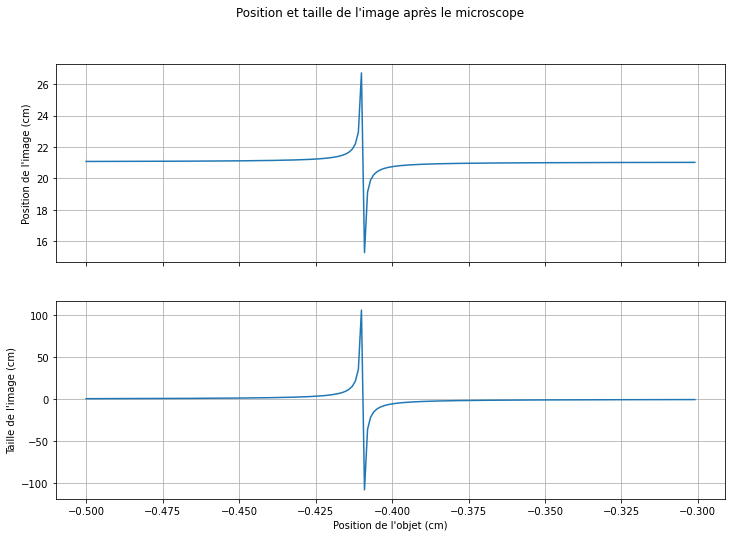

In [77]:
x = np.arange(-.5, -0.3, 0.001) # Positions d'objets
pos_image = [] # Liste pour stocker les positions des images
taille_image = [] # Liste pour stocjer les tailles des images


for pos_obj in x: # On obtient l'image finale pour chaque objet
    obj = [pos_obj, 1]
    imagef = microscope(fobj, f2, Delta, obj)
    #imagef = image([0, fobj], obj)
    pos_image.append(imagef[0])
    taille_image.append(imagef[1])

figs, ax = plt.subplots(2, 1, sharex='col', figsize=(12, 8))
figs.suptitle("Position et taille de l'image après le microscope")
ax[1].set_xlabel("Position de l'objet (cm)")
ax[0].set_ylabel("Position de l'image (cm)")
ax[1].set_ylabel("Taille de l'image (cm)")

ax[0].plot(x, pos_image)
ax[1].plot(x, taille_image)

ax[0].grid()
ax[1].grid()

## Résolution de l'équation stationnaire
On va déterminer la position de l'objet donnant une image à l'infini

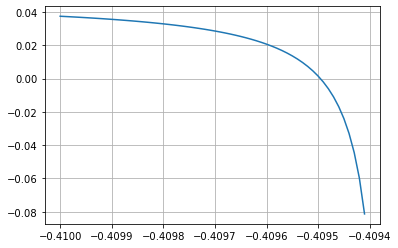

-0.40949554896093904


In [78]:
from scipy.optimize import bisect

def inv_image(pos_objet):
    """
    Renvoie l'inverse de la position de l'image connaissant la position de l'objet
    """
    fobj = 0.4
    f2 = 3
    Delta = 18
    obj = [pos_objet, 1]
    imagef = microscope(fobj, f2, Delta, obj)
    return 1 / imagef[0]
    
x = np.arange(-0.41, -0.4094, 0.00001) # On zoome pour avoir une fonction monotone et un seul changement de signe
y = inv_image(x)

figs, ax = plt.subplots()
ax.plot(x, y)
ax.grid()
plt.show()

x_bon = bisect(inv_image, -0.41, -0.4094)
print(x_bon)